In [104]:
from pyts.visualization import plot_gasf,plot_gadf,plot_mtf,plot_recurrence_plots
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
import torch.nn as nn
import statistics

In [51]:
import scipy.io
import pandas as pd
mat = scipy.io.loadmat('NetFlow.mat')
mdata = mat['mts']
mdtype = mdata.dtype


In [89]:
mdtype.names

('test', 'testlabels', 'train', 'trainlabels')

In [130]:
test = mdata[mdtype.names[0]]
flattest = test.flatten()
test_flat = np.concatenate(flattest, axis=0).flatten()

testlabels = mdata[mdtype.names[1]]
flattestlab = testlabels.flatten()
testlabels_flat = np.concatenate(flattestlab, axis=0).flatten()

train = mdata[mdtype.names[2]]
flattrain = train.flatten()
train_flat = np.concatenate(flattrain, axis=0).flatten()

trainlabels = mdata[mdtype.names[3]]
flattrainlab = trainlabels.flatten()
trainlabels_flat = np.concatenate(flattrainlab, axis=0).flatten()
print("test:",len(testlabels_flat))
print("train:",len(train_flat))
# b =0
# for i in range(len(testlabels_flat)):
    
#     c = (len(testlabels_flat[i][0])+len(testlabels_flat[i][1])+len(testlabels_flat[i][2])+len(testlabels_flat[i][3]))/4
#     if len(testlabels_flat[i][0]) == c:
#         b+=1
# print(b)
    

test: 534
train: 803


In [131]:
len(np.concatenate((train_flat,test_flat), axis=0))


1337

In [15]:
print('x_train',mat['x_train'].shape)
print('y_train',mat['y_train'].shape)
print('x_test',mat['x_test'].shape)

x_train (50, 28, 316)
y_train (1, 316)
x_test (50, 28, 100)


In [25]:
for i in range(50):
    print('num %s: %s' %(i,mat['x_train'][i].mean()))


num 0: 27.933001808318267
num 1: 28.130187613019896
num 2: 27.255300632911396
num 3: 27.16867088607595
num 4: 27.203040235081374
num 5: 27.346507685352623
num 6: 27.088969258589515
num 7: 26.821372061482823
num 8: 26.589794303797472
num 9: 26.417834538878846
num 10: 26.261607142857144
num 11: 26.07108951175407
num 12: 25.53021021699819
num 13: 25.343659584086797
num 14: 24.837341772151902
num 15: 24.40949367088608
num 16: 23.973508137432187
num 17: 24.47615280289331
num 18: 23.950361663652803
num 19: 24.314398734177217
num 20: 24.160137884267634
num 21: 24.453085443037978
num 22: 23.805357142857144
num 23: 23.671417269439424
num 24: 23.280018083182643
num 25: 23.242020795660036
num 26: 23.319563743218808
num 27: 23.445671338155517
num 28: 22.941433092224234
num 29: 22.756521247739602
num 30: 22.4999095840868
num 31: 23.033566907775775
num 32: 22.69761528028933
num 33: 23.20342450271248
num 34: 22.74468806509946
num 35: 22.567597197106693
num 36: 22.252373417721518
num 37: 22.8328774864

## rainbow TEST

In [24]:
import pandas as pd
import numpy as np
from PIL import Image
from pyts.visualization import plot_gasf
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
pre_path = "color_wafer_img"
# pre_path = "wafer_img"
is_whole=True
is_cross =True
method = "mtf"
cross_number_for_test =1

import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable

if is_whole==True:
    whole="_all"
else:
    whole=""
cross=["1","2","3","4","5"]
cross.remove(str(cross_number_for_test))
x = [  
    pd.read_json("normal"+whole+"_cross_"+cross[0]+".json"),
    pd.read_json("normal"+whole+"_cross_"+cross[1]+".json"),
    pd.read_json("normal"+whole+"_cross_"+cross[2]+".json"),
    pd.read_json("normal"+whole+"_cross_"+cross[3]+".json"),
    pd.read_json("abnormal"+whole+"_cross_"+cross[0]+".json"),
    pd.read_json("abnormal"+whole+"_cross_"+cross[1]+".json"),
    pd.read_json("abnormal"+whole+"_cross_"+cross[2]+".json"),
    pd.read_json("abnormal"+whole+"_cross_"+cross[3]+".json")
]
x = pd.concat(x)
x =  x.sample(frac=1)


def pil_loader(path):
    with open(path, 'rb') as f:
        img = Image.open(f)
        return img.convert('P')
lst = list()
count=0
lst2=list()
y=list()

for i in x.batch.unique():
    df=x[x.batch==i]
    lst = list()
    if np.all(df.status=="abnormal"):
        path="wafer_img_cross"+whole+"/"+method+"/"+str(df.iloc[0].cross)+"/abnormal/"
    else:
        path="wafer_img_cross"+whole+"/"+method+"/"+str(df.iloc[0].cross)+"/normal/"

    list_im = [
        path+str(i)+'_11.png', 
        path+str(i)+'_12.png', 
        path+str(i)+'_15.png', 
        path+str(i)+'_6.png', 
        path+str(i)+'_7.png', 
        path+str(i)+'_8.png', 
    ]
    imgs = [ pil_loader(i) for i in list_im ]
    min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
    imgs_comb = np.vstack( (np.asarray(i) for i in imgs ) )
    imgs_comb = np.array( imgs_comb)
    lst.append(np.array(imgs_comb)/255)

    arr = np.array(lst)
    if df.iloc[0].status=="normal":
        y.append(0)
    else:
        y.append(1)

    lst2.append(arr)    
#     count+=1
#     if count==1:
#         break
train_x = torch.from_numpy(np.array(lst2)).float()
train_y = torch.LongTensor(np.array(y))
print("fin")

fin


In [56]:
imgs_comb.

array([[255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ...,   8,   8,   8],
       [255, 255, 255, ...,   8,   8,   8],
       [255, 255, 255, ...,   8,   8,   8]], dtype=uint8)

In [59]:
import PIL.Image
image = PIL.Image.open('wafer_img_cross_all/mtf/2/normal/186105_11.png')
import numpy as np
image = np.asarray(image).shape
# image.shape
# image[...,:3].shape

(128, 128, 4)

In [54]:
image

array([[[  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        ...,
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255]],

       [[  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        ...,
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255]],

       [[  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        ...,
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255]],

       ...,

       [[  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        ...,
        [204, 204, 204, 255],
        [204, 204, 204, 255],
        [204, 204, 204, 255]],

       [[  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        ...,
        [204, 204, 204, 255],
        [204, 204, 204, 255],
        [204, 204, 204, 255]],

       [[  0

In [ ]:
### import torch.nn as nn

accuracy_matrix =[]
for i in range(5):
    min_error=100
    min_lose=100
    count=0
    number=1
#     cross = dataset_six_combine_method.dataset_dataloader(True,True,"mtf","gasf",i+1)
#     cross = dataset_combine_method.dataset_dataloader(True,True,"mtf","mtf",i+1)
    cross = dataset.dataset_dataloader("",True,True,"gasf",i+1)
    
    EPOCH = 50              # train the training data n times, to save time, we just train 1 epoch
    LR = 0.0023
    
    class CNN(nn.Module):
        def __init__(self):
            super(CNN, self).__init__()
            self.conv1 =nn.Sequential( #卷基層   
                nn.Conv2d(
                    in_channels  = 1  , # 圖片是有幾層的 若 RGB三層 灰階 1層
                    out_channels = 10, # 同時有幾個filter 進行掃描 會提取擠個特徵 代表下一層高度為擠
                    kernel_size  = 5  , # 一次畫出來的框 畫幾格 ex 5*5
                    stride       = 1  , # 每一個框框跳幾格
                    padding      = 2, # 在 5x5逐步掃描後會有少的格子 因此2代表在外面為兩圈的0
                                        # if stride =1 padding = (kernel_size-1)/2
                ),  # 過濾器 卷基層 蒐集圖片訊息 三維的空間  
                nn.ReLU(),
                nn.MaxPool2d(kernel_size=2), #找出更重要的特徵  像是在2x2中 找到 最大的值
            )                                # -> (16,64,64)
            self.conv2 = nn.Sequential(
                nn.Conv2d(10,20,5,1,2), # 輸入的是上一層的16 把輸出層在變大因此是32 其他不變
                nn.ReLU(),
                nn.MaxPool2d(2)             # -> (16,32,32)
            )
#             self.conv3 = nn.Sequential(
#                 nn.Conv2d(5,10,5,1,2), # 輸入的是上一層的16 把輸出層在變大因此是32 其他不變
#                 nn.ReLU(),
#                 nn.MaxPool2d(2)
#             )

            self.out = nn.Linear(20*192*32,2)
        def forward(self,x):

            x=self.conv1(x)
            x=self.conv2(x) #(batch.32.7.7)
#             x=self.conv3(x)
            x=x.view(x.size(0),-1) #將三維轉二維 (batch , 32*7*7)
            output=self.out(x)
            return output,x

    cnn=CNN()
    cnn.cuda()
#     print(cnn)

    optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)   # optimize all cnn parameters
    loss_func = nn.CrossEntropyLoss()                       # the target label is not one-hotted

    # following function (plot_with_labels) is for visualization, can be ignored if not interested

    # training and testing


    for epoch in range(EPOCH):
        for step, (x, y) in enumerate(cross.train_loader):   # gives batch data, normalize x when iterate train_loader
#             print(step)
            b_x = Variable(x).cuda()   # batch x
            b_y = Variable(y).cuda()   # batch y
#             print("b_x.size:",b_x.size())
            output = cnn(b_x)[0]             # cnn output
            loss = loss_func(output, b_y)   # cross entropy loss
            optimizer.zero_grad()           # clear gradients for this training step
            loss.backward()                 # backpropagation, compute gradients
            optimizer.step()                # apply gradients
            test_output, last_layer = cnn(cross.test_x)
            pred_y = torch.max(test_output, 1)[1].cuda().data.squeeze()
            accuracy = sum(pred_y == cross.test_y).item() / float(cross.test_y.size(0))
            error  = (1-accuracy)*100
            
            if error<min_error:
                min_error=error
                min_lose=100
                count=0
            else:
                count+=1
                print(".",end="")

            if error == min_error:
                if loss.data.item()<min_lose:
                    min_lose=loss.data.item()
#                     torch.save(cnn,'cnn_save/cnn'+str(number)+'.pkl')
                    number+=1
    #                 print('save!!')
    #                 print('\ncount: ',count,'Epoch: ', epoch, '| train loss: %.15f' % loss.data[0], '| min validation error rate: %.20f' % min_error)
            if count>=350:
                break
        if count>=350:
            break
    print("min_error:",min_error)
    # print 10 predictions from test data
    # test_output, _ = cnn(test_x)
    # pred_y = torch.max(test_output, 1)[1].cuda().data.squeeze()

    # print(pred_y, 'prediction number')
    # print(test_y, 'real number')
    accuracy_matrix.append(min_error)
    print('\n number: ',number-1 ,min_error)
    
import IPython.display as ipd
import numpy
sr = 22050 # sample rate
T = 0.3    # seconds
t = numpy.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*numpy.sin(2*numpy.pi*490*t)                # pure sine wave at 440 284Hz
ipd.Audio(x, rate=sr,autoplay=True) # load a NumPy array


# hstack RGB

In [21]:
import pandas as pd
import numpy as np
from PIL import Image
from pyts.visualization import plot_gasf
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
pre_path = "color_"
# pre_path = "wafer_img"
is_whole=True
is_cross =True
method = "mtf"
cross_number_for_test =1

import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable

if is_whole==True:
    whole="_all"
else:
    whole=""
cross=["1","2","3","4","5"]
cross.remove(str(cross_number_for_test))
x = [  
    pd.read_json("normal"+whole+"_cross_"+cross[0]+".json"),
    pd.read_json("normal"+whole+"_cross_"+cross[1]+".json"),
    pd.read_json("normal"+whole+"_cross_"+cross[2]+".json"),
    pd.read_json("normal"+whole+"_cross_"+cross[3]+".json"),
    pd.read_json("abnormal"+whole+"_cross_"+cross[0]+".json"),
    pd.read_json("abnormal"+whole+"_cross_"+cross[1]+".json"),
    pd.read_json("abnormal"+whole+"_cross_"+cross[2]+".json"),
    pd.read_json("abnormal"+whole+"_cross_"+cross[3]+".json")
]
x = pd.concat(x)
x =  x.sample(frac=1)


def pil_loader(path):
    with open(path, 'rb') as f:
        img = Image.open(f)
        return img.convert('RGB')
lst = list()
count=0
lst2=list()
y=list()

for i in x.batch.unique():
    df=x[x.batch==i]
    lst = list()
    if np.all(df.status=="abnormal"):
        path=pre_path+"wafer_img_cross"+whole+"/"+method+"/"+str(df.iloc[0].cross)+"/abnormal/"
    else:
        path=pre_path+"wafer_img_cross"+whole+"/"+method+"/"+str(df.iloc[0].cross)+"/normal/"

    list_im = [
        path+str(i)+'_11.png', 
        path+str(i)+'_12.png', 
        path+str(i)+'_15.png', 
        path+str(i)+'_6.png', 
        path+str(i)+'_7.png', 
        path+str(i)+'_8.png', 
    ]
    imgs = [ pil_loader(i) for i in list_im ]
    min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
    for k in range(3):
        imgs_comb = [np.asarray(i) for i in imgs]
        imgs_comb = np.vstack( (i[:,:,k] for i in imgs_comb ) )
        imgs_comb = np.array( imgs_comb)
        lst.append(np.array(imgs_comb)/255)
        
    lst3 = list()
    imgs_Hcomb = np.hstack( (i for i in lst ) )
    lst3.append(imgs_Hcomb)
    lst3 = np.array(lst3)
    
    arr = np.array(lst3)
    if df.iloc[0].status=="normal":
        y.append(0)
    else:
        y.append(1)

    lst2.append(arr)    
#     count+=1
#     if count==1:
#         break
train_x = torch.from_numpy(np.array(lst2)).float()
train_y = torch.LongTensor(np.array(y))
print("fin")

fin


In [22]:
arr.shape

(1, 768, 384)

In [20]:
lst3 = list()
imgs_Hcomb = np.hstack( (i for i in lst ) )
lst3.append(imgs_Hcomb)
ss = np.array(lst3)
ss.shape

(1, 768, 384)

# matrix symmetrix


In [31]:
import pandas as pd
import numpy as np
from PIL import Image
from pyts.visualization import plot_gasf
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable

if is_whole==True:
    whole="_all"
else:
    whole=""
cross=["1","2","3","4","5"]
cross.remove(str(cross_number_for_test))
x = [  
    pd.read_json("normal"+whole+"_cross_"+cross[0]+".json"),
    pd.read_json("normal"+whole+"_cross_"+cross[1]+".json"),
    pd.read_json("normal"+whole+"_cross_"+cross[2]+".json"),
    pd.read_json("normal"+whole+"_cross_"+cross[3]+".json"),
    pd.read_json("abnormal"+whole+"_cross_"+cross[0]+".json"),
    pd.read_json("abnormal"+whole+"_cross_"+cross[1]+".json"),
    pd.read_json("abnormal"+whole+"_cross_"+cross[2]+".json"),
    pd.read_json("abnormal"+whole+"_cross_"+cross[3]+".json")
]
x = pd.concat(x)
x =  x.sample(frac=1)


def pil_loader(path):
    with open(path, 'rb') as f:
        img = Image.open(f)
        return img.convert('L')
lst = list()
count=0
lst2=list()
y=list()

for i in x.batch.unique():
    df=x[x.batch==i]
    lst = list()
    if np.all(df.status=="abnormal"):
        path="wafer_img_cross"+whole+"/"+method+"/"+str(df.iloc[0].cross)+"/abnormal/"
    else:
        path="wafer_img_cross"+whole+"/"+method+"/"+str(df.iloc[0].cross)+"/normal/"

    for j in x.sensor.unique():
        img=pil_loader(path+str(i)+"_"+str(j)+".png")
        lst.append(np.array(img)/255)

    arr = np.array(lst)
    if df.iloc[0].status=="normal":
        y.append(0)
    else:
        y.append(1)

    lst2.append(arr)    
#     count+=1
#     if count==1:
#         break
train_x = torch.from_numpy(np.array(lst2)).float()
train_y = torch.LongTensor(np.array(y))

print("done")

In [32]:
train_x.size()

torch.Size([956, 6, 128, 128])

In [45]:
train_x[0][4].size()

torch.Size([128, 128])

In [46]:
arr = np.array(train_x[0][0])

In [47]:
(arr.transpose() == arr).all()

False

In [48]:
print(arr)

[[0.         0.         0.         ... 0.00784314 0.00784314 0.00784314]
 [0.         0.         0.         ... 0.00784314 0.00784314 0.00784314]
 [0.         0.         0.         ... 0.00784314 0.00784314 0.00784314]
 ...
 [0.         0.         0.         ... 0.5647059  0.5647059  0.5647059 ]
 [0.         0.         0.         ... 0.5647059  0.5647059  0.5647059 ]
 [0.         0.         0.         ... 0.5647059  0.5647059  0.5647059 ]]


In [53]:
for j in x.sensor.unique():
    img=pil_loader(path+str(i)+"_"+str(j)+".png")
    print(j,i)

6 166923
8 166923
11 166923
12 166923
15 166923
7 166923


In [56]:
sum(train_x[0][3] == train_x[0][3])

tensor([128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
        128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
        128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
        128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
        128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
        128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
        128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
        128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
        128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
        128, 128], dtype=torch.uint8)

In [59]:
def check_symmetric(a, tol=1e-8):
    return np.allclose(a, a.T, atol=tol)

In [60]:
d = check_symmetric(arr)

In [61]:
d

False

In [7]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.optim as optim
# use cuda or not
use_cuda = torch.cuda.is_available()
# root = './data'
download = True  # download MNIST dataset or not
trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (1.0,))])
train_set = dset.MNIST(root="mnist/", train=True, transform=trans, download=download)
test_set = dset.MNIST(root="mnist/", train=False, transform=trans)
batch_size = 128
train_loader = torch.utils.data.DataLoader(
                 dataset=train_set,
                 batch_size=batch_size,
                 shuffle=True)
test_loader = torch.utils.data.DataLoader(
                dataset=test_set,
                batch_size=batch_size,
                shuffle=False)

Processing...
Done!


In [12]:
len(train_loader)

469

In [23]:
class MLPNet(nn.Module):
    def __init__(self):
        super(MLPNet, self).__init__()
        self.fc1 = nn.Linear(28*28, 500)
        self.fc2 = nn.Linear(500, 256)
        self.fc3 = nn.Linear(256, 10)
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    

In [25]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500, 10)
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [27]:
class MLPNet(nn.Module):
    def __init__(self):
        super(MLPNet, self).__init__()
        self.fc1 = nn.Linear(28*28, 500)
        self.fc2 = nn.Linear(500, 256)
        self.fc3 = nn.Linear(256, 10)
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def name(self):
        return "MLP"

class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
    def name(self):
        return "LeNet"

## training
model = LeNet()

if use_cuda:
    model = model.cuda()

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

criterion = nn.CrossEntropyLoss()

In [136]:
for epoch in range(5):
    # trainning
    ave_loss = 0
    for batch_idx, (x, target) in enumerate(train_loader):
        optimizer.zero_grad()
        if use_cuda:
            x, target = x.cuda(), target.cuda()
        x, target = Variable(x), Variable(target)
        out = model(x)
        print(out.shape, target  .shape)
        loss = criterion(out, target)
        ave_loss = ave_loss * 0.9 + loss.data.item() * 0.1
        loss.backward()
        optimizer.step()
        if (batch_idx+1) % 100 == 0 or (batch_idx+1) == len(train_loader):
            print ('==>>> epoch: {}, batch index: {}, train loss: {:.6f}'.format(
                epoch, batch_idx+1, ave_loss))

torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])


torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])


torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])


torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])


torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])


torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])
torch.Size([128, 10]) torch.Size([128])


In [32]:
loss

tensor(0.0123, device='cuda:0', grad_fn=<NllLossBackward>)

In [33]:
x, target = Variable(x), Variable(target)

In [132]:
target

tensor([1, 9, 0, 1, 0, 1, 5, 0, 3, 3, 2, 3, 8, 7, 0, 7, 1, 6, 4, 7, 1, 0, 1, 1,
        1, 0, 0, 7, 2, 1, 0, 1, 9, 3, 3, 1, 0, 4, 2, 0, 8, 3, 7, 9, 9, 6, 5, 9,
        4, 6, 3, 8, 7, 1, 0, 7, 7, 5, 2, 4, 3, 7, 4, 8, 1, 1, 5, 0, 4, 1, 3, 0,
        3, 0, 1, 0, 9, 8, 4, 7, 8, 9, 2, 3, 0, 6, 3, 7, 7, 9, 1, 3, 3, 3, 5, 6],
       device='cuda:0')

In [133]:
loss

tensor(0.0123, device='cuda:0', grad_fn=<NllLossBackward>)

In [111]:
import numpy as np
# ts=[2.02, 2.33, 2.99, 6.85, 9.20, 8.80, 7.50, 6.00, 5.85, 3.85, 4.85, 3.85, 2.22, 1.45, 1.34]
ts=np.array([0.5581395349,0.8046511628,1.0,0.7023255814,0.4046511628,0.1069767442,0.1627906977,0.3581395349,0.3023255814,0.3348837209,0.2697674419,0.3069767442,0.2651162791,0.1627906977,0.1860465116,0.1581395349,0.1395348837,0.1255813953,0.1255813953,0.1209302326,0.0372093023,0.088372093,0.0465116279,0.111627907,0.0558139535,0.0,0.0279069767,0.023255814,0.023255814,0.0046511628,0.0651162791,0.0093023256,0.1534883721,0.1302325581,0.1953488372,0.2744186047,0.3627906977,0.3255813953,0.4976744186,0.4697674419,0.5023255814,0.5441860465,0.5162790698,0.5488372093,0.6372093023,0.5255813953,0.5953488372,0.5627906977,0.5674418605,0.5534883721,0.5302325581,0.6186046512,0.4930232558,0.5348837209,0.5255813953,0.5860465116,0.5395348837,0.5348837209,0.5441860465,0.5581395349,0.6,0.5395348837,0.4930232558,0.5720930233,0.5302325581,0.4744186047,0.5395348837,0.5023255814,0.5162790698,0.4744186047,0.488372093,0.6,0.5581395349,0.5953488372,0.6186046512,0.5069767442,0.576744186,0.4744186047,0.5162790698,0.4511627907,0.4697674419,0.4046511628,0.4651162791,0.4325581395,0.4837209302,0.3162790698,0.4418604651,0.4046511628,0.488372093,0.4139534884,0.3627906977,0.4046511628,0.488372093,0.376744186])
size = len(ts)
size_new = int(ts_size/3)

In [54]:
def bin_allocation_integers(x, n_bins, quantiles):

    for i in range(n_bins - 1):
        if x < quantiles[i]:
            return i

    return n_bins - 1
def mtf(ts, ts_size, image_size, n_bins, quantiles, overlapping):

    # Compute empirical quantiles if quantiles == 'empirical'
    if type(quantiles) == str:
        quantiles = np.percentile(ts, np.linspace(0, 100, n_bins + 1)[1:])

    # Compute binned time series
    binned_ts = np.array([bin_allocation_integers(x, n_bins, quantiles) for x in ts])

    # Compute Markov Transition Matrix
    MTM = np.zeros((n_bins, n_bins))
    for i in range(ts_size - 1):
        MTM[binned_ts[i], binned_ts[i + 1]] += 1
    non_zero_rows = np.where(MTM.sum(axis=1) != 0)[0]
    MTM = np.multiply(MTM[non_zero_rows][:, non_zero_rows].T, np.sum(MTM[non_zero_rows], axis=1)**(-1)).T

    return MTM ,quantiles
    

In [55]:
mtm,quantiles = mtf(ts, size, size_new, n_bins=5, quantiles='empirical', overlapping=False)

In [56]:
quantiles

array([0.15627907, 0.40465116, 0.49674419, 0.55069767, 1.        ])

In [57]:
mtm

array([[0.89473684, 0.10526316, 0.        , 0.        , 0.        ],
       [0.0625    , 0.75      , 0.125     , 0.0625    , 0.        ],
       [0.05      , 0.15      , 0.5       , 0.2       , 0.1       ],
       [0.        , 0.        , 0.26315789, 0.42105263, 0.31578947],
       [0.        , 0.        , 0.15789474, 0.31578947, 0.52631579]])

In [74]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

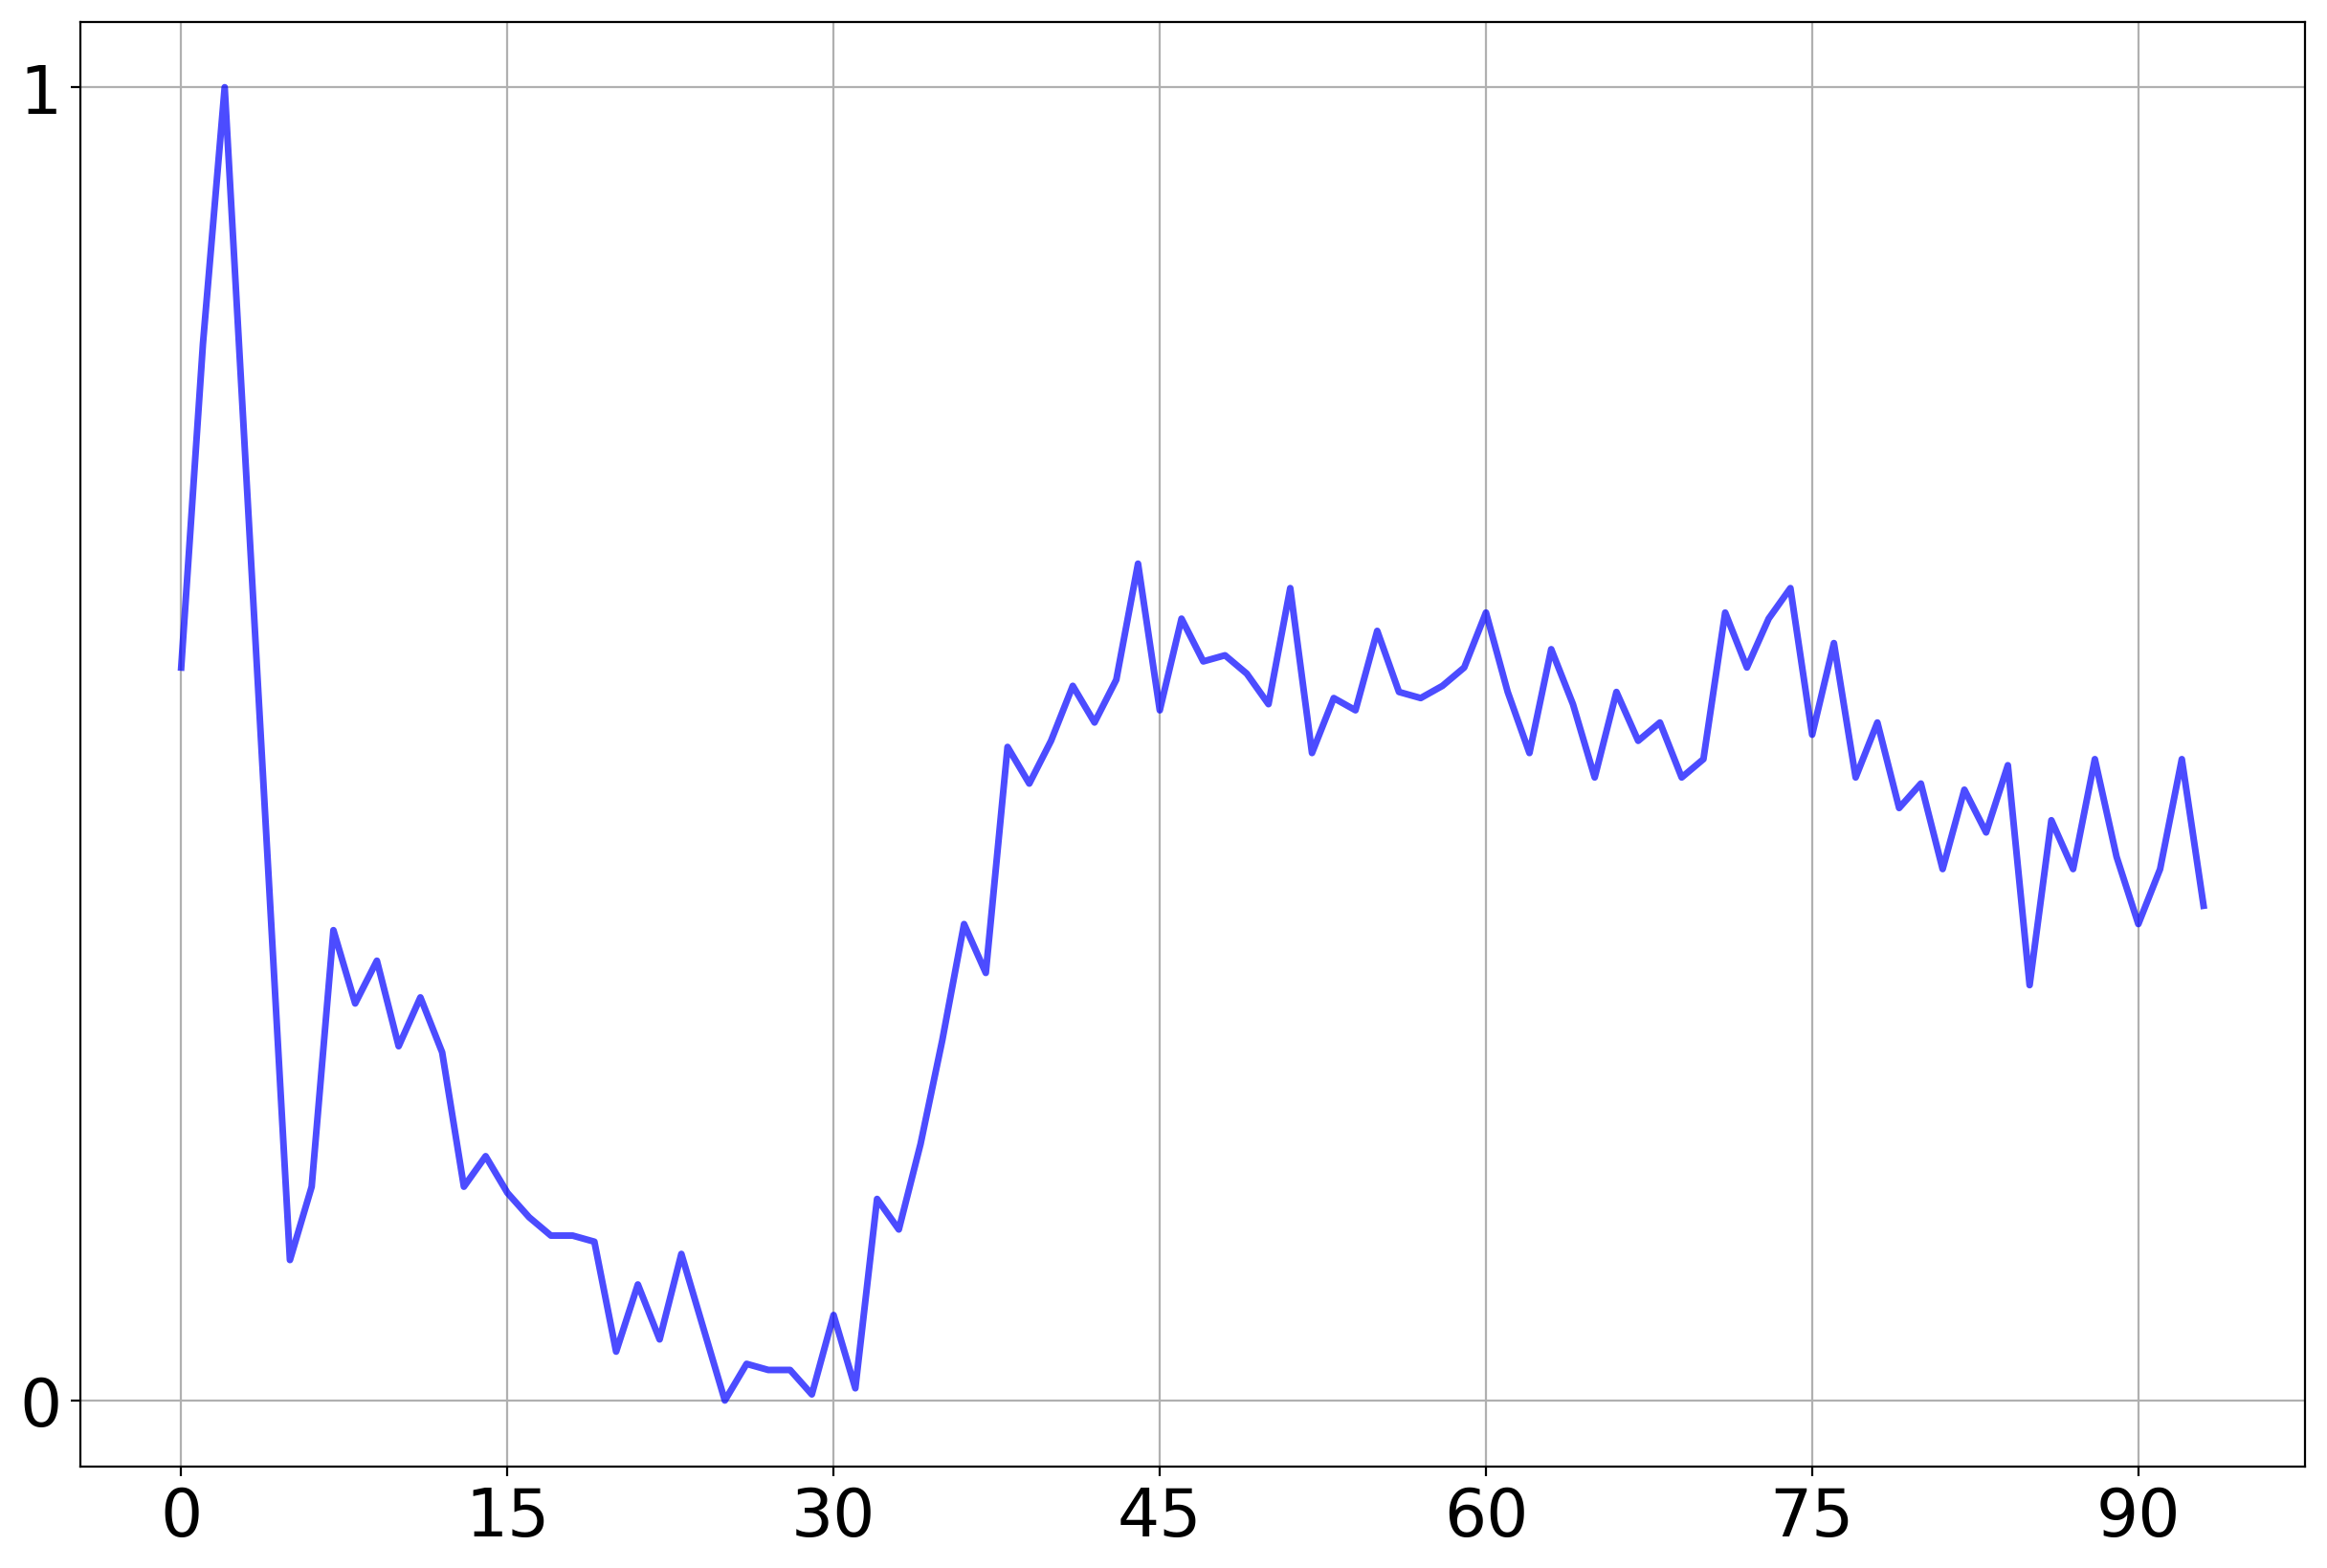

In [80]:
fig = plt.figure(figsize=(15,10), dpi=200)
ax = fig.add_subplot(1,1,1)
ax.plot(ts,'b-',linewidth=2.5, alpha=0.7,label='origin')
ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
ax.grid()
# ax.axhline(y=quantiles[0],color='g',linestyle='--',linewidth=1.3)
# ax.axhline(y=quantiles[1],color='r',linestyle='--',linewidth=1.3)
# ax.axhline(y=quantiles[2],color='g',linestyle='--',linewidth=1.3)
# ax.axhline(y=quantiles[3],color='r',linestyle='--',linewidth=1.3)
# ax.axhline(y=quantiles[4],color='g',linestyle='--',linewidth=1.3)

In [60]:
from pyts.visualization import plot_gasf,plot_gadf,plot_mtf,plot_recurrence_plots

C:\ProgramData\Anaconda3\lib\site-packages\pyts\utils\utils.py:176: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  MTF[np.meshgrid(list_values[i], list_values[j])] = MTM[i, j]


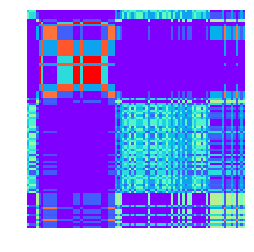

In [65]:
plot_mtf(ts,cmap="rainbow",image_size=94,output_file="mtf_ts"+".png")

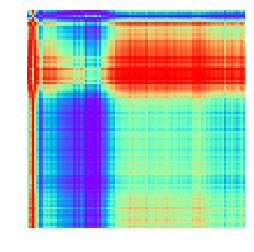

In [67]:
plot_gadf(ts,cmap="rainbow",image_size=94,output_file="gadf_ts"+".png")

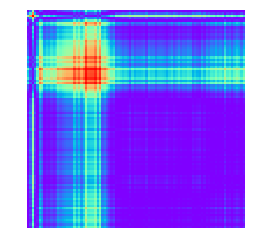

In [68]:
plot_gasf(ts,cmap="rainbow",image_size=94,output_file="gasf_ts"+".png")

In [106]:
ts = np.array([0.0,
      0.0,
      0.0,
      0.0,
      0.0,
      0.0,
      0.0,
      0.0,
      0.0,
      0.0,
      0.0,
      0.0,
      0.0,
      0.0,
      0.0,
      0.0,
      100.0,
      100.0,
      100.0,
      100.0,
      100.0,
      100.0,
      100.0,
      100.0,
      100.0,
      100.0,
      100.0,
      100.0,
      100.0,
      1.7595307918,
      0.0488758553,
      0.0,
      0.0,
      0.0,
      0.0,
      0.0,
      0.0,
      0.0,
      0.0,
      0.0,
      0.0,
      0.0,
      0.0,
      0.0,
      0.0,
      0.0,
      0.0,
      25.4643206256,
      46.1876832845,
      54.6432062561,
      54.8875855327,
      55.0342130987,
      55.1319648094,
      55.1808406647,
      55.2785923754,
      55.2785923754,
      55.2785923754,
      55.376344086,
      55.22971652,
      55.2785923754,
      55.3274682307,
      55.3274682307,
      55.3274682307,
      55.376344086,
      55.4740957967,
      55.4740957967,
      55.5718475073,
      55.6207233627,
      55.6207233627,
      55.5718475073,
      55.6207233627,
      55.669599218,
      55.7184750733,
      55.669599218,
      55.7184750733,
      55.7673509286,
      55.7673509286,
      55.7184750733,
      55.7184750733,
      55.7184750733,
      55.6207233627,
      55.669599218,
      55.669599218,
      55.669599218,
      55.6207233627,
      55.669599218,
      55.7184750733,
      55.816226784,
      55.816226784,
      55.7673509286,
      55.7673509286,
      55.7184750733,
      55.7184750733,
      55.7673509286,
      55.8651026393,
      55.816226784,
      55.816226784,
      55.8651026393,
      55.8651026393,
      55.9139784946,
      55.96285435,
      55.8651026393,
      55.8651026393,
      55.96285435,
      55.96285435,
      55.96285435,
      56.0117302053,
      56.0117302053,
      56.0117302053,
      56.0117302053,
      56.0606060606,
      56.0606060606,
      55.96285435,
      55.96285435,
      55.96285435,
      55.96285435,
      55.96285435,
      55.96285435,
      55.96285435,
      55.96285435,
      55.9139784946,
      55.9139784946,
      55.9139784946,
      55.9139784946,
      55.9139784946,
      55.9139784946,
      55.96285435,
      55.96285435,
      56.0117302053,
      56.0606060606,
      56.0606060606,
      56.0606060606,
      56.0117302053,
      0.0,
      0.0,
      0.0,
      0.0,
      0.0,
      0.0,
      0.0,
      0.0])



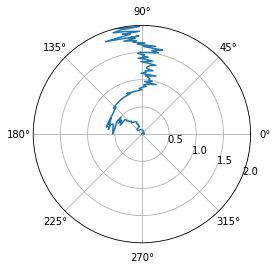

In [113]:
serie = ts
from sklearn import preprocessing 
# ts = preprocessing.minmax_scale(ts,feature_range=(0,1))
min_ = np.amin(serie)
max_ = np.amax(serie)
scaled_serie = (2*serie - max_ - min_)/(max_ - min_)

# Floating point inaccuracy!
scaled_serie = np.where(scaled_serie >= 1., 1., scaled_serie)
scaled_serie = np.where(scaled_serie <= -1., -1., scaled_serie)

# Polar encoding
phi = np.arccos(scaled_serie)

r = np.linspace(0, 2, len(scaled_serie))


ax = plt.subplot(111, projection='polar')
ax.plot(phi, r)
ax.set_rmax(2)
ax.set_rticks([0.5, 1,1.5,2])  # less radial ticks
ax.set_rlabel_position(-22.5)  # get radial labels away from plotted line
ax.grid(True)

In [99]:
scaled_serie

array([-1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        , -0.96480938,
       -0.99902248, -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -0.49071359, -0.07624633,  0.09286413,
        0.09775171,  0.10068426,  0.1026393 ,  0.10361681,  0.10557185,
        0.10557185,  0.10557185,  0.10752688,  0.10459433,  0.10557185,
        0.10654936,  0.10654936,  0.10654936,  0.10752688,  0.10948192,
        0.10948192,  0.11143695,  0.11241447,  0.11241447,  0.11

In [97]:
scaled_serie

array([-1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        , -0.96480938,
       -0.99902248, -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -0.49071359, -0.07624633,  0.09286413,
        0.09775171,  0.10068426,  0.1026393 ,  0.10361681,  0.10557185,
        0.10557185,  0.10557185,  0.10752688,  0.10459433,  0.10557185,
        0.10654936,  0.10654936,  0.10654936,  0.10752688,  0.10948192,
        0.10948192,  0.11143695,  0.11241447,  0.11241447,  0.11

In [114]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [141]:
x = np.arange(-4.5, 4.5, 0.01)

In [145]:
def plot(func, yaxis=(-1.4, 1.4)):
    plt.ylim(yaxis)
    plt.locator_params(nbins=5)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.axhline(lw=1, c='black')
    plt.axvline(lw=1, c='black')
    plt.grid(alpha=0.4, ls='--')
    plt.box(on=None)
    plt.plot(x, func(x), c='b', lw=3)

In [146]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

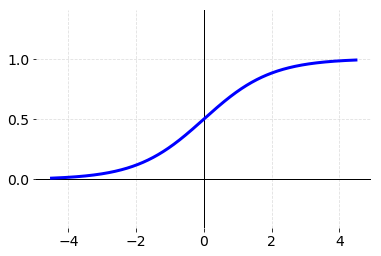

In [147]:
plot(sigmoid, yaxis=(-0.4, 1.4))

In [148]:
def softplus(x):
    return np.log(1+np.exp(x))

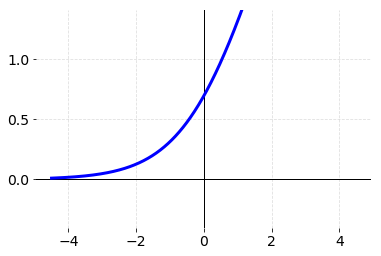

In [149]:
plot(softplus, yaxis=(-0.4, 1.4))

In [150]:
relu = np.vectorize(lambda x: x if x > 0 else 0, otypes=[np.float])

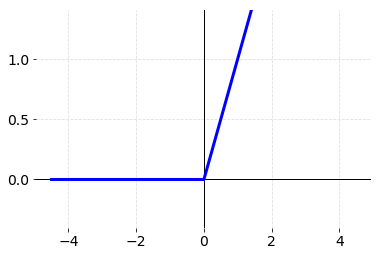

In [151]:
plot(relu, yaxis=(-0.4, 1.4))

In [152]:
def tanh(x):
    return 2 / (1 + np.exp(-2 * x)) -1

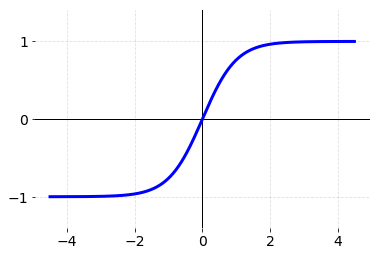

In [153]:
plot(tanh)